# DM Control

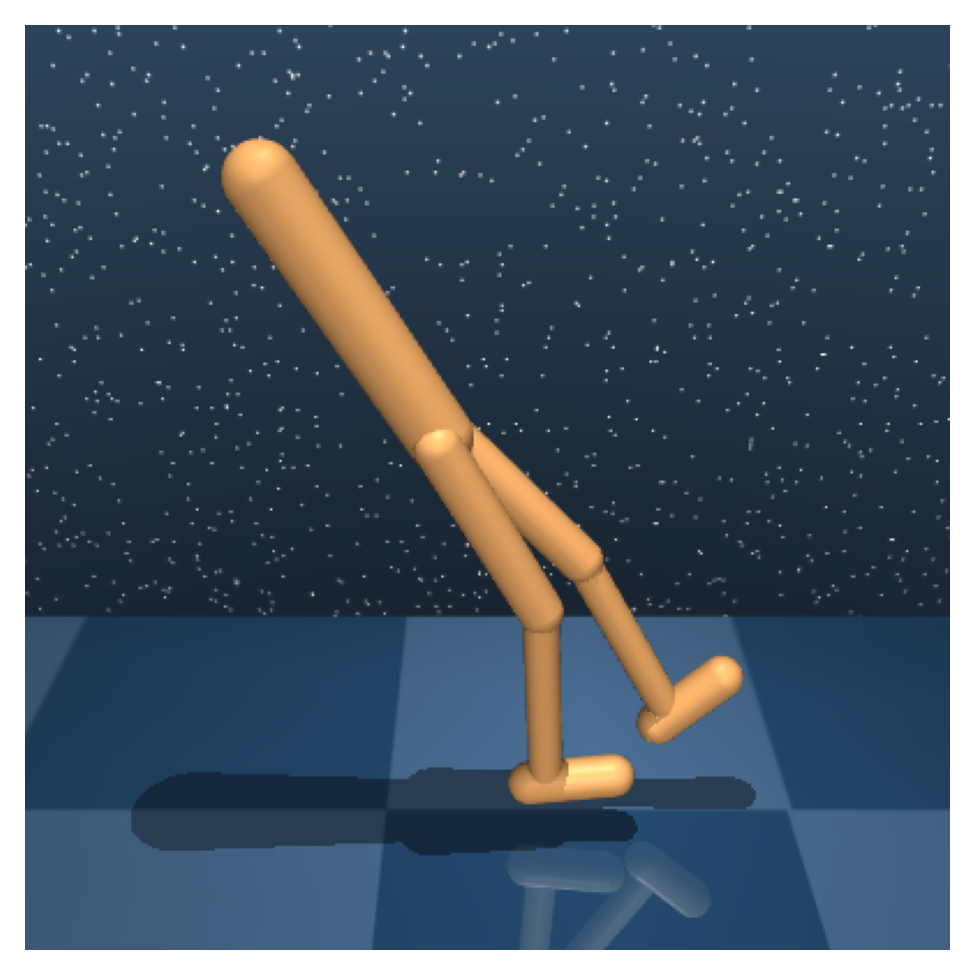

In [54]:
# flake8: noqa: F401
# type: ignore
import matplotlib.pyplot as plt
from pathlib import Path

from carl.envs import CARLDmcFishEnv
from carl.envs import CARLDmcQuadrupedEnv
from carl.envs import CARLDmcWalkerEnv
from carl.envs.carl_env import CARLEnv


def render(env: CARLEnv):
    s = env.reset()
    img = env.render(mode="rgb_array", width=400, height=400, camera_id=0)
    fig = plt.figure(figsize=(4, 4), dpi=250)
    ax = fig.add_subplot(111)
    ax.imshow(img)
    ax.axis("off")
    fig.set_tight_layout(True)
    plt.show()
    env_name = type(env).__name__
    fig_fn = Path(f"./renders/render_{env_name}.png")
    fig_fn.parent.mkdir(exist_ok=True, parents=True)
    fig.savefig(fig_fn, bbox_inches="tight", dpi=250)


envs = [
    # CARLDmcWalkerEnv(task="walk_context"),
    # CARLDmcQuadrupedEnv(task="walk_context"),
    # CARLDmcFishEnv(task="upright_context"),
]
for env in envs:
    render(env=env)
